# EDA Notebook
Please note: the purpose is the notebook is to perform inital EDA and data cleaning on the `online_shoppers_intention.csv`. 

Once the dataframe is ready for modeling, it will be exported and used in the `draft_model_notebook.ipynb` notebook.

## Business Questions:
- How does the number of visiors differ each month?
- Do returning visitors have a higher revenue than one-time visitors?
- What feature has the best and worst impact on revenue?

In [9]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# add import for Decision Treees
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

## 1. Loading `online_shoppers_intention.csv`

In [11]:
df = pd.read_csv('online_shoppers_intention.csv')

In [13]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [15]:
df.isna().sum()
# no missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [19]:
df.shape

(12330, 18)

## Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7e16e1630>,
      dtype=object)

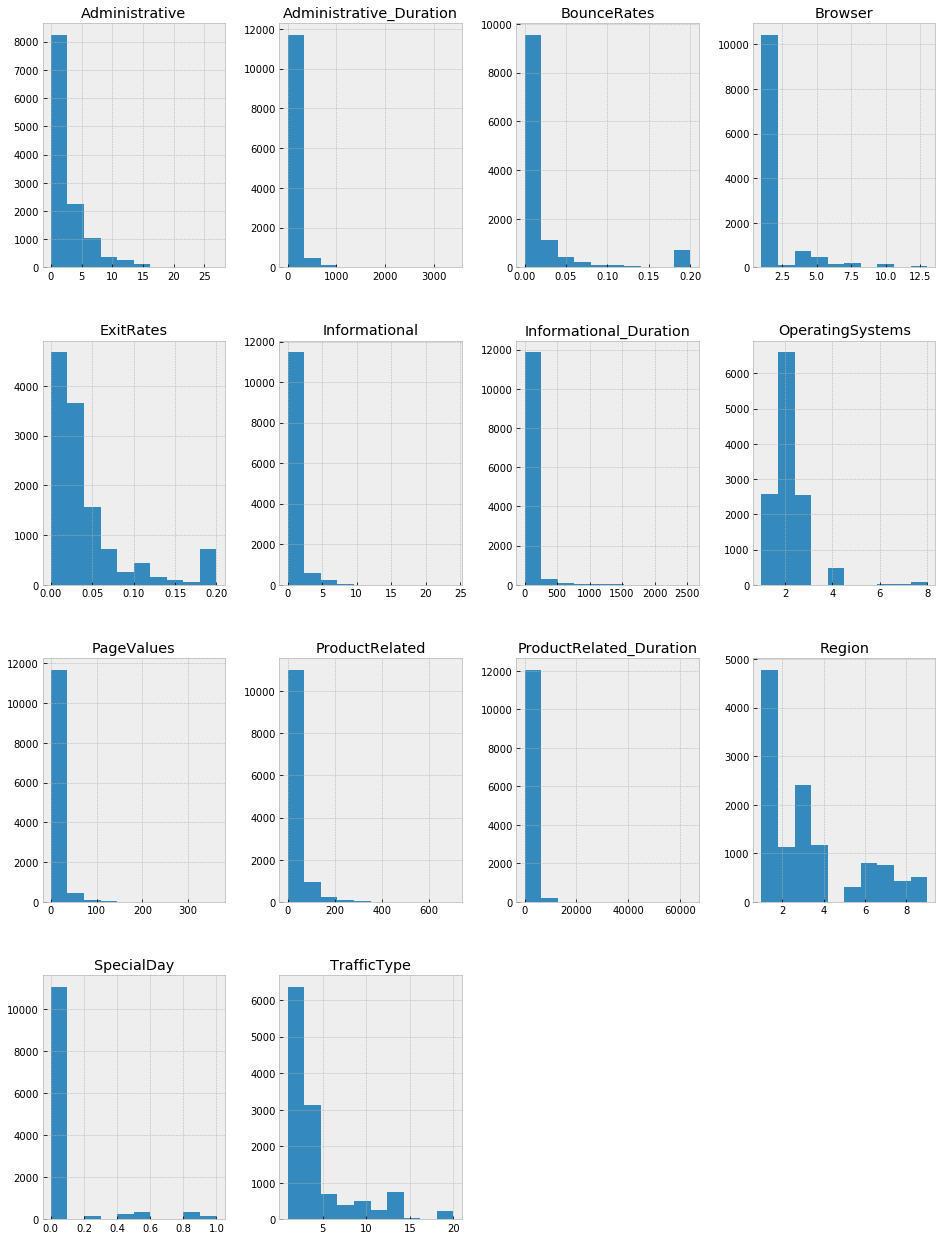

In [21]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(16,22))

In [23]:
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [25]:
(5768/12330)*100

46.78021086780211

#### 47% of site visitors did not visit administrative pages

#### The scatterplot below indicates no correlation between the Administrative and Administrative_Duration features.

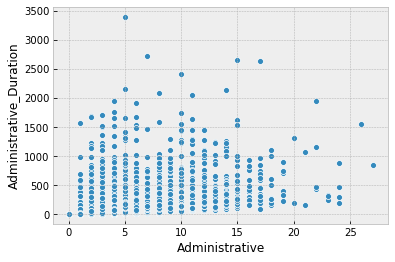

In [27]:
sns.scatterplot(data=df, x="Administrative", y="Administrative_Duration") 

In [29]:
df['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

In [31]:
(9699/12330)*100

78.661800486618

#### 79% of site visitors did not visit nformational pages.

#### The scatterplot below indicates no correlation between the Informational & Informational_Duration features.

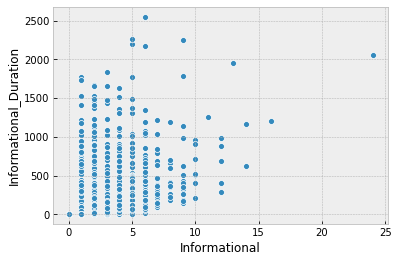

In [33]:
sns.scatterplot(data=df, x="Informational", y="Informational_Duration") 

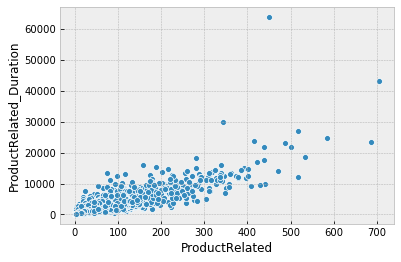

In [35]:
sns.scatterplot(data=df, x="ProductRelated", y="ProductRelated_Duration") 

#### The scatterplot indicates a positive correlation between the ProductRelated and ProductRelated_Duration variables.

#### We will investigate this further.

In [37]:
df.BounceRates.describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

In [39]:
df.ExitRates.describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

In [41]:
df.PageValues.describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

## Categorical Features

In [43]:
# (Sidney) 9 features
# EDA on 'SpecialDay' - 'Revenue'

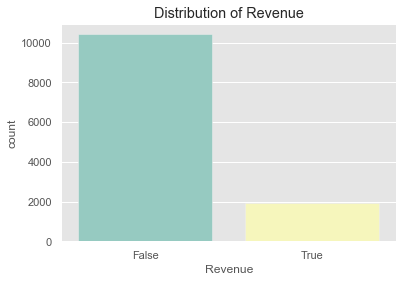

In [87]:
# checking class imbalance with the 'Revenue' target
sns.countplot(df['Revenue'], palette='Set3').set_title('Distribution of Revenue')
plt.savefig('visualizations/class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [47]:
# checking the exact class imalance with the positive class
df.Revenue.sum() / len(df.Revenue)
# so our positive class is the minority

0.15474452554744525

This means that only 15.5% of site viewers in this dataset purchased the product.

Obviously this is a terrible purchase rate, so we want to investigate why this happened.

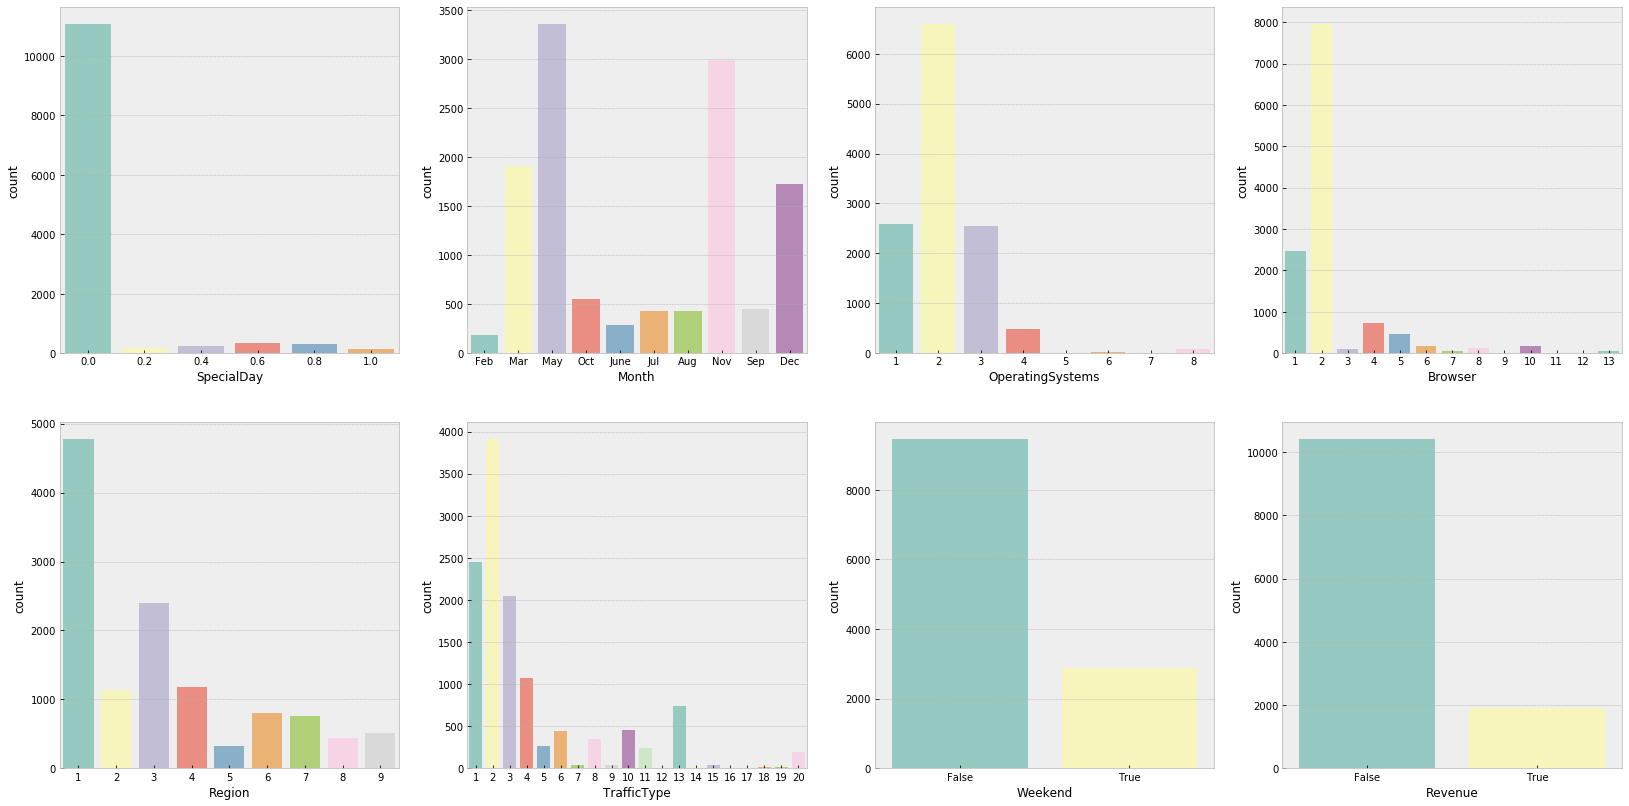

In [49]:
# checking frequency distribution for all categorical variables

fig, ax = plt.subplots(2,4, figsize=(28,14))
sns.countplot(df['SpecialDay'], ax=ax[0,0], palette='Set3')
sns.countplot(df['Month'], ax=ax[0,1], palette='Set3')
sns.countplot(df['OperatingSystems'], ax=ax[0,2], palette='Set3')
sns.countplot(df['Browser'], ax=ax[0,3], palette='Set3')
sns.countplot(df['Region'], ax=ax[1,0],palette='Set3')
sns.countplot(df['TrafficType'], ax=ax[1,1],palette='Set3')
sns.countplot(df['Weekend'], ax=ax[1,2],palette='Set3')
sns.countplot(df['Revenue'], ax=ax[1,3],palette='Set3')
fig.show()

Observations:
- `SpecialDay`:
- `Month`: Most entries are in the March, May, November and December months
- `OperatingSystems`:
- `Browser`: A majority of people use browser type 2, but we don't know what that is
- `Region`: Although it looks like the site gets traffic from 9 different regions, '1' has the most
- `TrafficType`: Again, it's hard to interpret this without a legend for the values
- `Weekend`: There's an obvious class imalance here because there are 5 weekdays. We can look more closely on how Weekend interacts with the numerical data
- `Revenue`: Class imalance of 85% for the negative class

In [51]:
df.Browser.unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11])

In [53]:
df.OperatingSystems.unique()

array([1, 2, 4, 3, 7, 6, 8, 5])

In [55]:
df.TrafficType.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

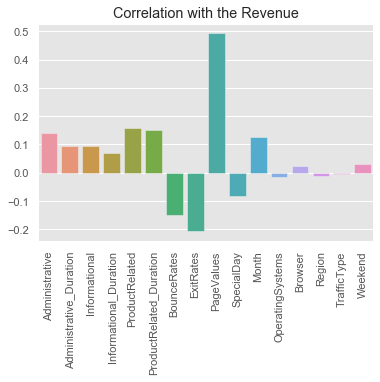

In [85]:
# Correlation with Revenue
data_corr = df.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.savefig('visualizations/target_corr.png', bbox_inches = "tight", pad_inches=.5)

From this graph, we can see that PageValues has the highest correlation (around 0.5) with Revenue, compared to other features.

In [59]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

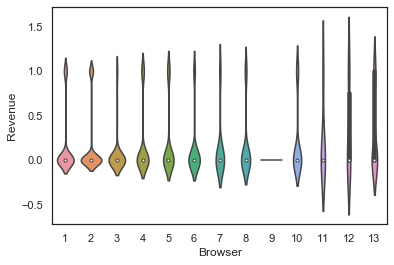

In [61]:
sns.violinplot(data = df, x='Browser', y='Revenue')

### Checking for Multicollinearity

In [63]:
# creating a numerical correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                    0.223563                 0.144170   
ExitRates                      0.316483                 0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                     0.094778                 0.073304   
OperatingSystems               0.006347                 0.007343   
Browser                        0.025035                 0.015392   
Region                         0.005487                 0.005561   
TrafficType                    0.033561                 0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                   0.116114                0.074067   
ExitRates                     0.163666                0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                    0.048219                0.030577   
OperatingSystems              0.009527                0.009579   
Browser                       0.038235                0.019285   
Region                        0.029169                0.027144   
TrafficType                   0.034491                0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939     0.223563   
Administrative_Duration        0.289087                 0.355422     0.144170   
Informational                  0.374164                 0.387505     0.116114   
Informational_Duration         0.280046                 0.347364     0.074067   
ProductRelated                 1.000000                 0.860927     0.204578   
ProductRelated_Duration        0.860927                 1.000000     0.184541   
BounceRates                    0.204578                 0.184541     1.000000   
ExitRates                      0.292526                 0.251984     0.913004   
PageValues                     0.056282                 0.052823     0.119386   
SpecialDay                     0.023958                 0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                        0.013146                 0.007380     0.015772   
Region                         0.038122                 0.033091     0.006485   
TrafficType                    0.043064                 0.036377     0.078286   
Weekend                        0.016092                 0.007311     0.046514   
Revenue                        0.158538                 0.152373     0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative            0.316483    0.098990    0.094778          0.006347   
Administrative_Duration   0.205798    0.067608    0.073304          0.007343   
Informational             0.163666    0.048632    0.048219          0.009527   
Informational_Duration    0.105276    0.030861 

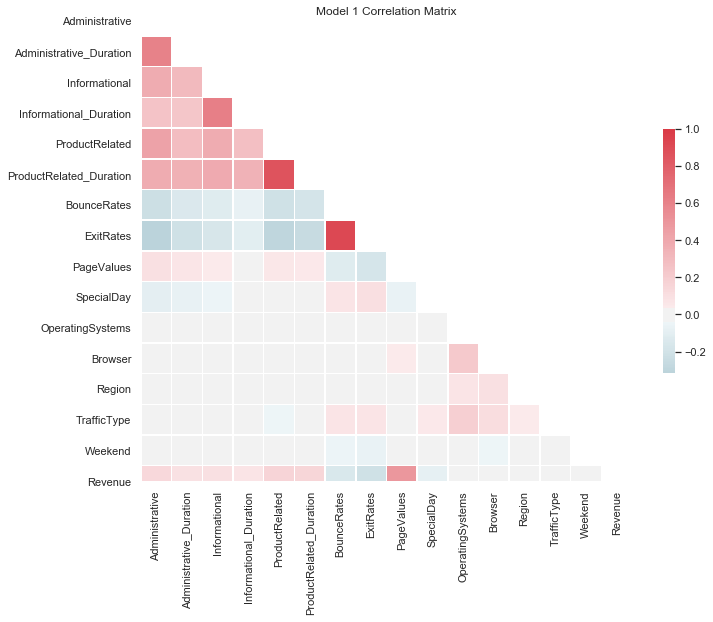

In [65]:
# Checking for multicolinearity because we might have to drop some features
sns.set(style="white")
# compute the correlation matrix
corr = df.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Model 1 Correlation Matrix')

plt.savefig('visualizations/corr_heatmap.png', bbox_inches = "tight", pad_inches=.5)

What are the interpretations of this correlation matrix? The features that have high correlations will have to be removed, to avoid multicoliniarity in the model.

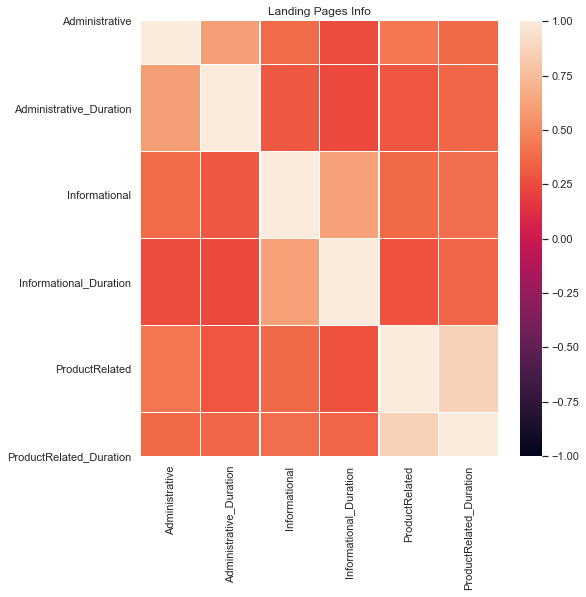

<Figure size 432x288 with 0 Axes>

In [67]:
## Checking for multicolinearlity between landing page features
corr = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

plt.figure(figsize = (8,8))
plt.title('Landing Pages Info')
corr = df[corr].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

plt.savefig('visualizations/landing_page_corr.png', bbox_inches = "tight", pad_inches=.5)

## Business Problem EDA

In [ ]:
df.head()

In [58]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [60]:
df['Month'] = df['Month'].str.replace('Jan', '1')
df['Month'] = df['Month'].str.replace('Feb', '2')
df['Month'] = df['Month'].str.replace('Mar', '3')
df['Month'] = df['Month'].str.replace('Apr', '4')
df['Month'] = df['Month'].str.replace('May', '5')
df['Month'] = df['Month'].str.replace('June', '6')
df['Month'] = df['Month'].str.replace('Jul', '7')
df['Month'] = df['Month'].str.replace('Aug', '8')
df['Month'] = df['Month'].str.replace('Sep', '9')
df['Month'] = df['Month'].str.replace('Oct', '10')
df['Month'] = df['Month'].str.replace('Nov', '11')
df['Month'] = df['Month'].str.replace('Dec', '12')

In [78]:
df['Month'] = df.Month.astype(int)

In [79]:
df.groupby('Month')['VisitorType'].count()

Month
2      184
3     1907
5     3364
6      288
7      432
8      433
9      448
10     549
11    2998
12    1727
Name: VisitorType, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(2

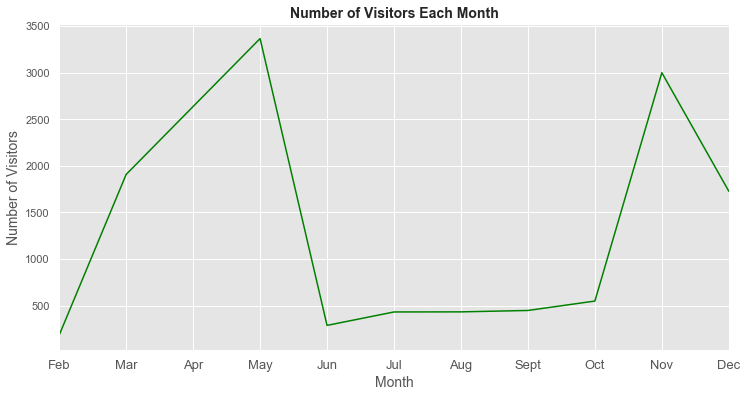

In [84]:
# x-axis: sorting dataframe by months and setting that equal to months
df.sort_values(by='Month', ascending=True)
month = sorted(df['Month'].unique())
# y-axis: the number of site visitors each month
num_vistors = df.groupby('Month')['VisitorType'].count()

# creating a line plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(month, num_vistors, color='green')

# setting title and axis labels
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Visitors', fontsize=14)
ax.set_title('Number of Visitors Each Month', fontsize=14, weight='bold')

# setting x-axis labels to match each month
ax.set_xlim(2, 12)
ax.set_xticks((2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=13)

plt.savefig('visualizations/num_visitors.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

In [70]:
### Types of Visitors

## Export Finished Dataframe

In [71]:
df.to_csv('model_data.csv')